<center>
    <h1> 
        Teste de Hipótese 1.9: Visualização das Médias Móvel das Médias dos Histogramas das Amostras e Avaliação de Setores
    </h1>
</center>
    <div style="text-align: right;"><h3>
        Carlos Eduardo Cassimiro da Silva
    </h3></div>

<p>No teste 1.3 foi possível verificar com maior precisão a diferenciação dos canais de cores dos diferentes documentos através das médias dos seus histogramas. Da mesma maneira, faz-se necessário averiguar as médias dos histogramas das amostras ruins e compará-las com as amostras boas mas ter uma ideia melhor da dissimilaridade dos dois tipos de amostras.</p>
<p> Nos outros teste vimos como melhorar o contraste e o brilho das imagens, entretanto, precisamos encontrar uma maneira de identificar quais amostras são ruins para aplicar tal pré-processamento. Uma forma de fazer isso é tentando usar a quantificação do padrão HSV (Hue, Saturation, Value) para calcular a média de saturão nos dois tipos de amostras.</p>

<h4>Desafio #1: Classificação de documentos (RG, CNH e CPF) </h4>

 - Contextualização: Inúmeras áreas de diferentes organizações (usualmente como parte de um processo de um backoffice) recepcionam documentos dos seus clientes para formação de kits de documentação. Tais kits são, por exemplo, compartilhados com outros stakeholders das empresas. Conforme pode-se pressupor, um desafio nesse cenário refere-se ao fato de que o cliente pode enviar documentos, porém sem necessariamente indicar a qual tipo se o documento se refere (RG, CNH ou CPF, por exemplo). Dessa forma, ao invés de demandar um trabalho manual para essa leitura e classificação dos documentos, podemos construir um modelo de aprendizado que tenha capacidade de ler um conjunto de documentos (em .jpg, por exemplo) e, subsequentemente, realizar a classificação em três tipos distintos: RG, CNH e CPF.
 - Dataset: Para esse desafio utilizaremos um dataset público de RG, CNH e CPF (incluindo as imagens). Este repositório apresenta o conjunto de dados denominado Brazilian Identity Document Dataset (BID Dataset), o primeiro conjunto de dados público de documentos de identificação brasileiros. <br>
Link do dataset: https://github.com/ricardobnjunior/Brazilian-Identity-Document-Dataset

<h4>Roteiro</h4>
Módulos utilizados <br>
1. Comparação das médias dos histogramas dos documentos <br>
2. Calculando a média da saturação das amostras apartir do formato HSV  <br>
3. Conclusão

##### Módulos utilizados

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
plt.style.use('ggplot')

# 1. Comparação das médias dos histogramas dos documentos

In [3]:
# Lista de nomes para facilitar o acesso as pastas e aos arquivos
documentos = ['cpf_frente','cpf_tras','rg_frente','rg_tras','cnh_frente','cnh_tras']

In [4]:
# Laço para repetir o processos anteriores de um vez para todos as amostras boas
medias = {}    # Dicionário para guardar todos as amostras dos documentos e as médias dos histogramas
docs_bons = [] # Lista para salvar as imagens para utiliza-las mais na frente
for k in documentos:    # Laço iterando sobre a lista de nomes
    doc = []            # Lista para salvar os documentos
    for i in range(0,20):   # Laço para normalizar todos os histogramas do referido documento da vez
        hist = []     # Lista para salvar os histogramas
        # Abre e converte o sistema de cores para RGB
        doc.append(cv2.cvtColor(cv2.imread('amostras_boas/'+k+'/'+k+' ('+str(i+1)+').jpg'), cv2.COLOR_BGR2RGB))
        docs_bons.append(doc[i])
        
        hist.append(cv2.calcHist(doc[i],[0],None,[256],[0,256]))  # Processo análogo ao anterior para 
        hist.append(cv2.calcHist(doc[i],[1],None,[256],[0,256]))  # cálcular as média dos histogramas
        hist.append(cv2.calcHist(doc[i],[2],None,[256],[0,256]))
        for j in range(0,3):
            mm = MinMaxScaler()
            hist[j] = mm.fit_transform(hist[j], hist[j])
        doc[i] = hist

    # Média dos histogramas
    sum_red = 0
    sum_green = 0
    sum_blue = 0
    
    for i in range(len(doc)):
        sum_red += doc[i][0]
        sum_green += doc[i][1]
        sum_blue += doc[i][2]
        
    sum_red = sum_red/len(doc)
    sum_green = sum_green/len(doc)
    sum_blue = sum_blue/len(doc)
    
    # Salva o resultado em um dicionário para facilitar nas plotagens
    medias[k] = {'matrix': cv2.cvtColor(cv2.imread('amostras_boas/'+k+'/'+k+' ('+str(1)+').jpg'), cv2.COLOR_BGR2RGB),
                 'hist':[sum_red, sum_green, sum_blue]}

In [5]:
# Laço para repetir o processos anteriores de um vez para todas as amostras ruins
medias2 = {}    # Dicionário para guardar todos as amostras dos documentos e as médias dos histogramas
docs_ruins = [] # Lista para salvar as imagens para utiliza-las mais na frente
for k in documentos:    # Laço iterando sobre a lista de nomes
    doc = []            # Lista para salvar os documentos
    for i in range(0,7):   # Laço para normalizar todos os histogramas do referido documento da vez
        hist = []     # Lista para salvar os histogramas
        # Abre e converte o sistema de cores para RGB
        doc.append(cv2.cvtColor(cv2.imread('amostras_ruins/'+k+'/'+k+' ('+str(i+1)+').jpg'), cv2.COLOR_BGR2RGB))
        docs_ruins.append(doc[i])
         
        hist.append(cv2.calcHist(doc[i],[0],None,[256],[0,256]))  # Processo análogo ao anterior para 
        hist.append(cv2.calcHist(doc[i],[1],None,[256],[0,256]))  # cálcular as média dos histogramas
        hist.append(cv2.calcHist(doc[i],[2],None,[256],[0,256]))
        for j in range(0,3):
            mm = MinMaxScaler()
            hist[j] = mm.fit_transform(hist[j], hist[j])
        doc[i] = hist

    # Média dos histogramas
    sum_red = 0
    sum_green = 0
    sum_blue = 0
    
    for i in range(len(doc)):
        sum_red += doc[i][0]
        sum_green += doc[i][1]
        sum_blue += doc[i][2]
        
    sum_red = sum_red/len(doc)
    sum_green = sum_green/len(doc)
    sum_blue = sum_blue/len(doc)
    
    # Salva o resultado em um dicionário para facilitar nas plotagens
    medias2[k] = {'matrix': cv2.cvtColor(cv2.imread('amostras_ruins/'+k+'/'+k+' ('+str(1)+').jpg'), cv2.COLOR_BGR2RGB),
                 'hist':[sum_red, sum_green, sum_blue]}

In [12]:
def media_movel(doc_type, n, medias, canal):
    medias_suavizada = []
    tam = len(medias[doc_type]['hist'][0])

    for i in range(tam-n):
        soma = 0
        for j in range(n):
            soma += medias[doc_type]['hist'][canal][i+j][0]
        medias_suavizada.append(soma/n)
        
    for i in range(n,tam-n,-1):
        soma = 0
        for j in range(n):
            soma += medias[doc_type]['hist'][canal][i-j][0]
        medias_suavizada.append(soma/n)
    
    return medias_suavizada

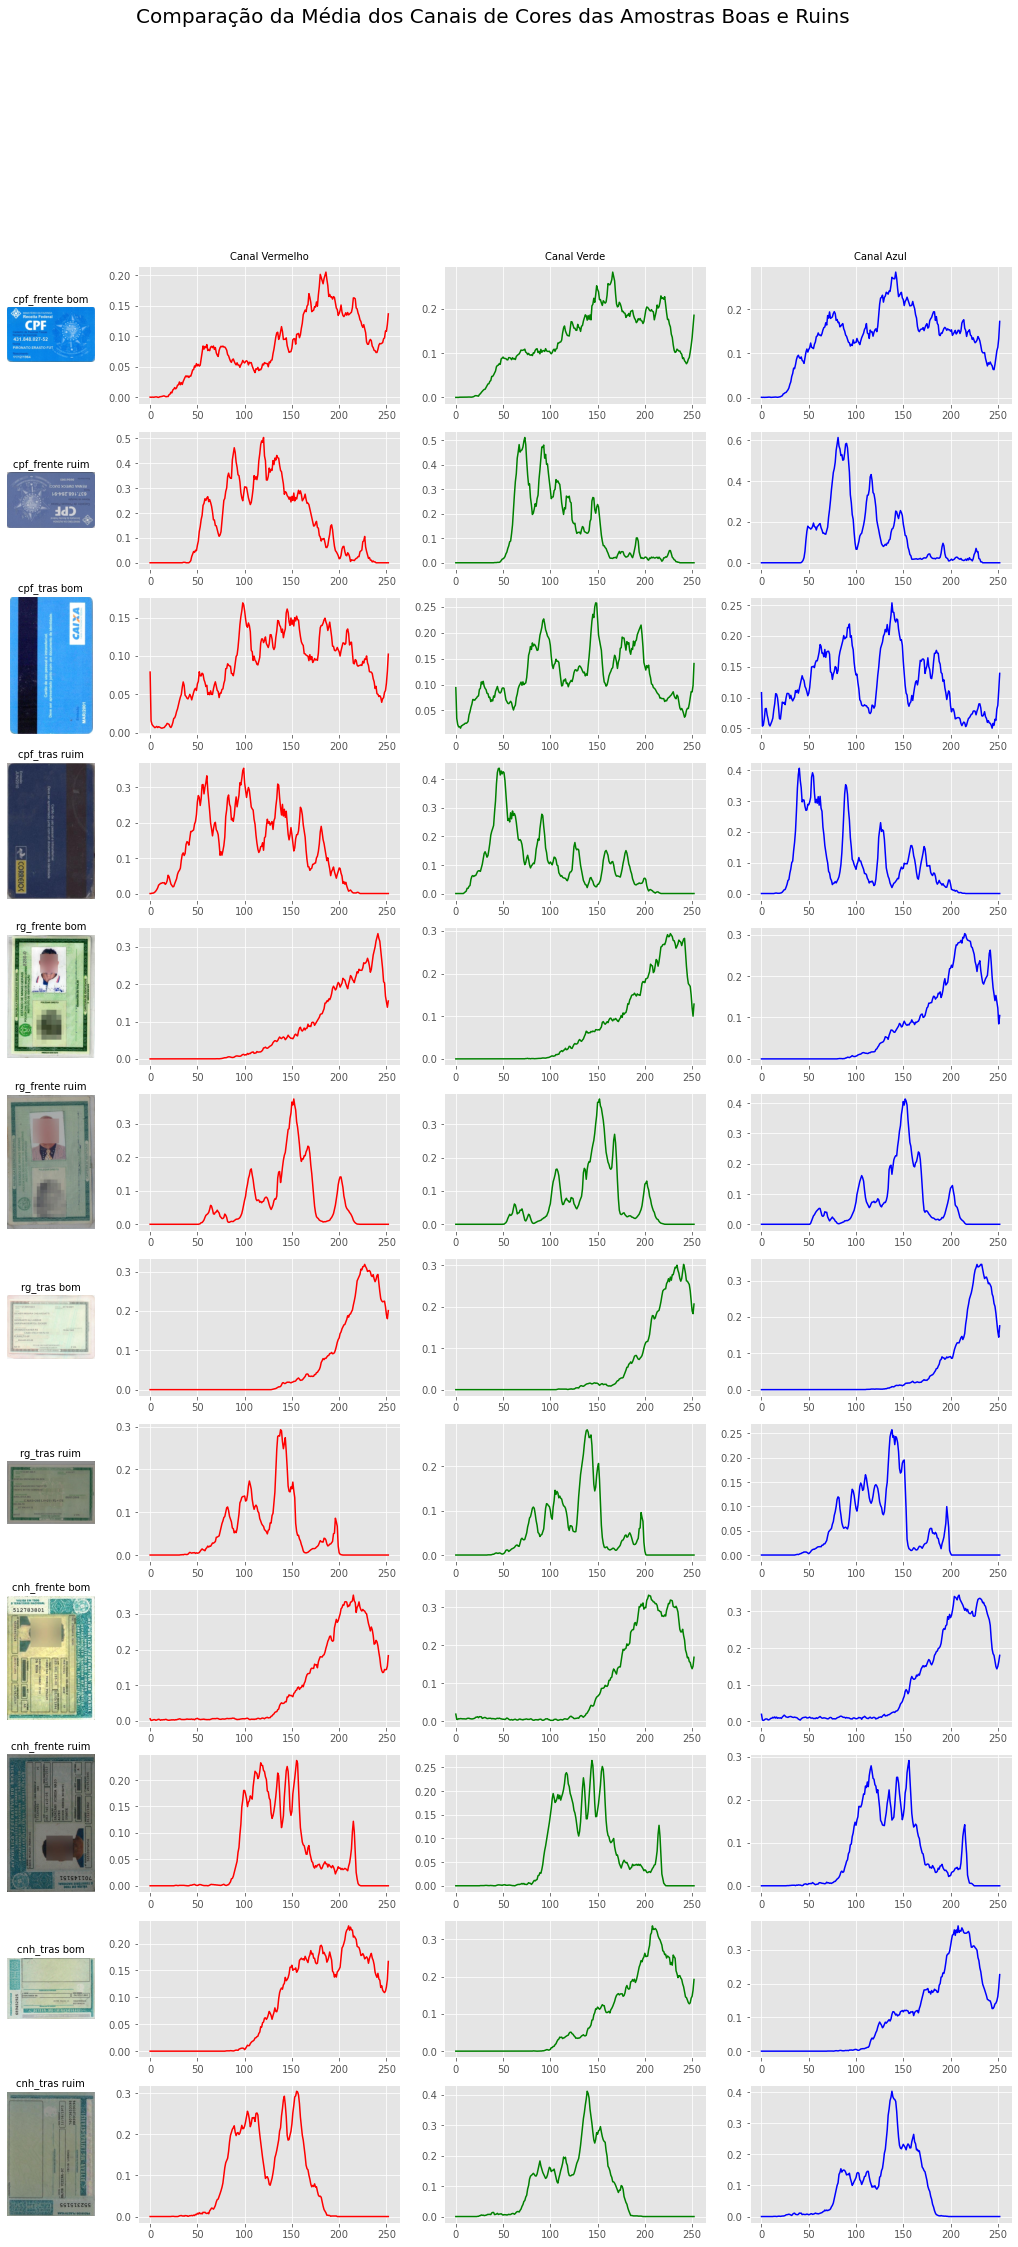

In [16]:
# Plot análogo ao anterior
n = len(medias.keys()) + len(medias2.keys())
fig , ax = plt.subplots(n, 4, figsize=(18,3*n), gridspec_kw={'width_ratios': [1,3,3,3]})

k = 3
cont = 0
ax.flatten()
ax = ax.T.flatten()
for i,doc in zip(range(0,n,2),documentos):
    ax[0+(i)].imshow(medias[doc]['matrix']); 
    ax[0+(i)].axis('off'); ax[0+(i)].set_title(doc + ' bom',fontsize=10)

    ax[n+(i)].plot(media_movel(doc, k, medias, 0), color='red');
    ax[n*2+(i)].plot(media_movel(doc, k, medias, 1), color='green')
    ax[n*3+(i)].plot(media_movel(doc, k, medias, 2), color='blue')

    ax[0+(i+1)].imshow(medias2[doc]['matrix']); 
    ax[0+(i+1)].axis('off'); ax[0+(i+1)].set_title(doc + ' ruim',fontsize=10)

    ax[n+(i+1)].plot(media_movel(doc, k, medias2, 0), color='red');
    ax[n*2+(i+1)].plot(media_movel(doc, k, medias2, 1), color='green')
    ax[n*3+(i+1)].plot(media_movel(doc, k, medias2, 2), color='blue')
    
    if i == 0 :
        ax[n+(i)].set_title('Canal Vermelho',fontsize=10)
        ax[n*2+(i)].set_title('Canal Verde',fontsize=10)
        ax[n*3+(i)].set_title('Canal Azul',fontsize=10)
    
fig.suptitle('Comparação da Média Móvel das Médias dos Canais de Cores das Amostras', fontsize=20)
plt.show()

Comparando as médias dos histogramas das amostras boas e da ruins podemos ver que os dois são bem separaveis e que os histogramas das amostras escuras possuem um padrão de concentração dos histogramas no centro. Assim vemos mais uma vez a necessidade de aplicar algum pré-processamento nessas amotras, bem como de identificar quando realizar esse pré-processamento.

In [ ]:
def media(doc_typemedias, canal):
    medias_suavizada = []
    tam = len(medias[doc_type]['hist'][0])

    for i in range(49,150):
        soma = 0
        for j in range(n):
            soma += medias[doc_type]['hist'][canal][i+j][0]
    medias_suavizada.append(soma/n)
        
    for i in range(n,tam-n,-1):
        soma = 0
        for j in range(n):
            soma += medias[doc_type]['hist'][canal][i-j][0]
        medias_suavizada.append(soma/n)
    
    return medias_suavizada

In [27]:
medias['cpf_frente']['hist'][0][49:150]

array([[0.06061021],
       [0.04786056],
       [0.05763149],
       [0.04959666],
       [0.05506744],
       [0.0490959 ],
       [0.05428464],
       [0.08480419],
       [0.08127201],
       [0.08661432],
       [0.06924977],
       [0.09447213],
       [0.0806039 ],
       [0.08442017],
       [0.06524384],
       [0.0860093 ],
       [0.07850466],
       [0.08211149],
       [0.0903427 ],
       [0.07187784],
       [0.09033768],
       [0.07346729],
       [0.08100917],
       [0.06432479],
       [0.06252445],
       [0.07442288],
       [0.09338056],
       [0.07675157],
       [0.08131944],
       [0.09025693],
       [0.08050741],
       [0.07652118],
       [0.09085426],
       [0.07397766],
       [0.06735967],
       [0.06865479],
       [0.06842719],
       [0.05312408],
       [0.0567416 ],
       [0.06226472],
       [0.0661506 ],
       [0.06043504],
       [0.05015143],
       [0.05571548],
       [0.05386268],
       [0.06054199],
       [0.04456891],
       [0.053

In [40]:
for doc in documentos:
    soma1 = []
    soma2 = []
    soma11 = []
    soma22 = []
    for i in range(3):
        soma1.append(np.mean(medias[doc]['hist'][i][99:150]))
        soma2.append(np.mean(medias2[doc]['hist'][i][99:150]))
        soma11.append(np.mean(medias[doc]['hist'][i][199:256]))
        soma22.append(np.mean(medias2[doc]['hist'][i][199:256]))
    medias[doc]['media'] = (soma1[0]+soma1[1]+soma1[2])/3
    medias2[doc]['media'] = (soma2[0]+soma2[1]+soma2[2])/3
    medias[doc]['media2'] = (soma11[0]+soma11[1]+soma11[2])/3
    medias2[doc]['media2'] = (soma22[0]+soma22[1]+soma22[2])/32

In [44]:
for doc in documentos:
    print(doc, ' bom: ', medias[doc]['media'], ' | ', 
          medias[doc]['media2'], ' | ', 
          (medias[doc]['media'] > medias[doc]['media2']))
    print(doc, ' ruim:  ', medias2[doc]['media'], ' | ', 
          medias2[doc]['media2'], ' | ', 
          (medias2[doc]['media'] > medias2[doc]['media2']))
    print('---')

cpf_frente  bom:  0.13718408346176147  |  0.14481245477994284  |  False
cpf_frente  ruim:   0.25334930419921875  |  0.001558313611894846  |  True
---
cpf_tras  bom:  0.1401373247305552  |  0.09120398759841919  |  True
cpf_tras  ruim:   0.12664171059926352  |  0.0006136323208920658  |  True
---
rg_frente  bom:  0.0340907076994578  |  0.23137005170186362  |  False
rg_frente  ruim:   0.12123413880666097  |  0.0020057624205946922  |  True
---
rg_tras  bom:  0.004302539552251498  |  0.2302500605583191  |  False
rg_tras  ruim:   0.14697688817977905  |  9.82074998319149e-05  |  True
---
cnh_frente  bom:  0.016825862228870392  |  0.2755223512649536  |  False
cnh_frente  ruim:   0.18729472160339355  |  0.001800653408281505  |  True
---
cnh_tras  bom:  0.0538693368434906  |  0.23056280612945557  |  False
cnh_tras  ruim:   0.197125514348348  |  0.0  |  True
---


# 2. Calculando a média da saturação das amostras apartir do formato HSV

In [10]:
# Convertendo as amostras em HSV
hsv_bons = []
hsv_ruins = []

for k in docs_bons:
    hsv_bons.append(cv2.cvtColor(k, cv2.COLOR_RGB2HSV))
    
for k in docs_ruins:
    hsv_ruins.append(cv2.cvtColor(k, cv2.COLOR_RGB2HSV))

In [11]:
# Calculando as médias de saturação de cada imagem
media_sat_bons = []
media_sat_ruins = []

for h in hsv_bons:
    _, S, _ =  cv2.split(h)
    media_sat_bons.append(np.mean(S))
    
for h in hsv_ruins:
    _, S, _ =  cv2.split(h)
    media_sat_ruins.append(np.mean(S))

In [15]:
# Calculando a média total de saturação de cada tipo de documento
media_sat_final_ruins = []
media_sat_final_bons = []

for i in range(len(documentos)):
    media_sat_final_ruins.append(np.mean(media_sat_ruins[7*i:7*(i+1)])) # [7*i:7*(i+1)] iterar sobre o fatiamento
    media_sat_final_bons.append(np.mean(media_sat_bons[20*i:20*(i+1)]))

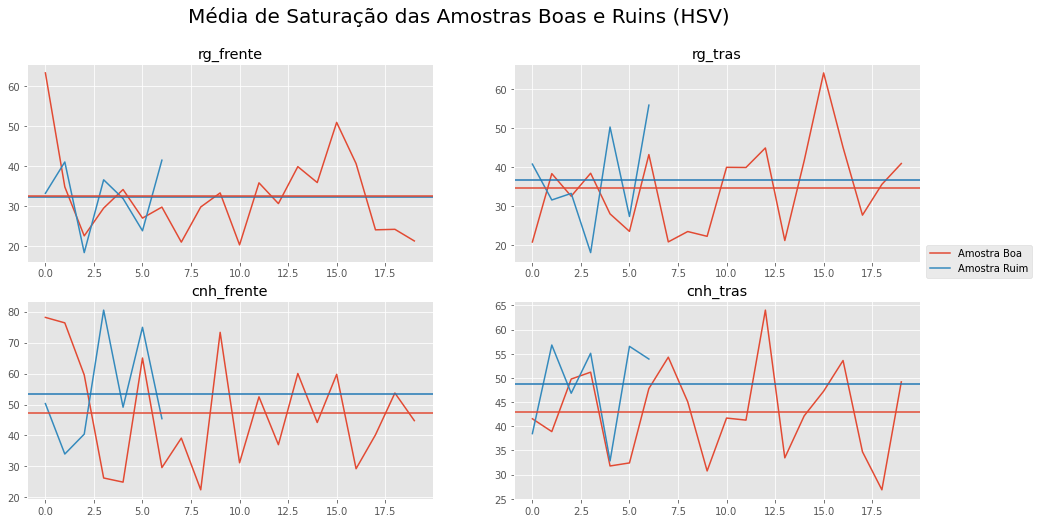

In [19]:
# Plot para visualizar a diferenças das médias de saturação de cada tipo de documento

n = len(documentos) # Número de figuras

fig = plt.figure(figsize=(16,8))

for i in range(n): # Laço para automatizar as plotagens
    fig.add_subplot(2,2,i+1) # Adiciona um novo subplot em cada iteração
    
    # Plot das médias de saturação das amostras
    plt.plot(list(range(20)), media_sat_bons[20*i:20*(i+1)]) # [20*i:20*(i+1)] iterar sobre a porção de cada
    plt.plot(list(range(7)), media_sat_ruins[7*i:7*(i+1)])   # tipo de documento
    
    # Plot da média final de cada tipo de documento em forma de linha
    plt.axhline(media_sat_final_ruins[i], c='tab:blue')
    plt.axhline(media_sat_final_bons[i])
    
    plt.title(documentos[i])
    
fig.legend(['Amostra Boa','Amostra Ruim'], loc='center right')
fig.suptitle('Média de Saturação das Amostras Boas e Ruins (HSV)', fontsize=20)
plt.show();

Podemos ver que as médias são bem próximas, dessa mandeira, avaliar a saturação das imagens não é uma boa opção. <br>
Obs.: Como estou utilizando um dataset amostral e não o completo, nele não havia tantas amostras ruins, então foi utilizado somente 7 amostras em cada, por essa razão os pontos azuis acabam antes.

# 3. Conclusão

Nesse teste verificamos a diferença entre os histogramas das amostras boas e das amostras ruins de forma mais concisa. Podemos ver que os histogramas das amostras mais escuras seguem um padrão bem diferente das amostras boas, dessa mandeira, para podermos conseguir classificá-las de maneira adequada, precisamos realizar um preprocessamento para aproximá-las dos padrões das amostras boas. Para isso, faz-se necessário encontrar uma maneria de identificar quais são essas amostras. <br>
Nesse notebook, tentamos fazer isso verificando o nível de saturação através do formato HSV das imagens, mas não obtemos bons resultados, como podemos ver nos plots das médias de saturação.

Obs.: Os cps não foram utilizados nessa análise por avaliar que eles já são mais facilmente separáveis.

---


img = cv2.cvtColor(cv2.imread('amostras_boas/rg_frente/rg_frente (1).jpg'), cv2.COLOR_BGR2HSV)

H, S, V = cv2.split(cv2.cvtColor(cv2.imread('amostras_ruins/rg_frente/rg_frente (1).jpg'), cv2.COLOR_BGR2HLS))
S = S + 30
V = V + 30
img2 = cv2.cvtColor(cv2.merge([H, S, V]), cv2.COLOR_HLS2RGB)
img = cv2.cvtColor(img, cv2.COLOR_HLS2RGB)
plt.imshow(img2)

plt.imshow(img)